## feature scaling과 성능 개선
feature scaling은 특정 값의 범위를 균일하게 맞춰주는 작업입니다.
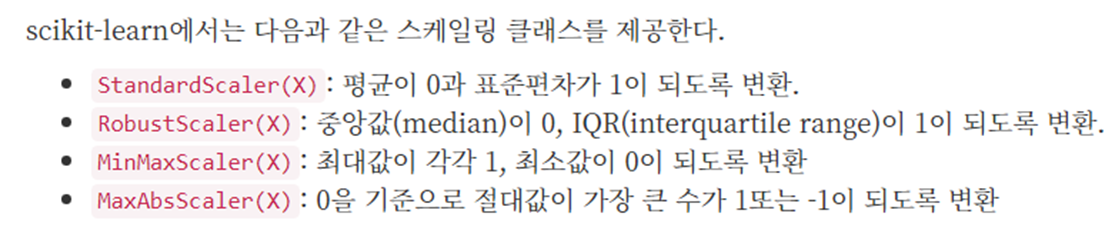

In [1]:
import pandas as pd
df=pd.read_csv('data/house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df = df.drop(['id','date'],axis=1) # axis=0은 행, axis=1은 열을 의미 
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
from sklearn.model_selection import train_test_split

input_data = df.drop(['price'],axis=1)
target_data = df['price']

x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

### 정규분포의 속성을 이용한 StandardScaler 적용하기
- 왜 오류가 나지??

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs_train = scaler.fit_transform(x_train)
xs_train = pd.DataFrame(xs_train, columns = x_train.columns)

# ys_train = scaler.fit_transform(y_train)
# ys_train = pd.DataFrame(ys_train, columns = y_train.columns)

xs_valid = scaler.fit_transform(x_valid)
xs_valid = pd.DataFrame(xs_valid, columns = x_valid.columns)

ys_valid = scaler.fit_transform(y_valid)
ys_valid = pd.DataFrame(ys_valid, columns = y_valid.columns)

ValueError: Expected 2D array, got 1D array instead:
array=[675000. 750000. 597400. ... 860000. 559000. 830000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(xs_train, ys_train)
print('train set score', lr.score(xs_train, ys_train))
print('valid set score', lr.score(xs_valid, ys_valid))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(2),
                     LinearRegression()).fit(xs_train, ys_train)
print('train set score',model.score(xs_train, ys_train))
print('valid set score',model.score(xs_valid, ys_valid))

In [ ]:
#Ridge는 decision tree의 복잡도를 낮춰 overfitting 문제를 해결하는 데 자주 사용됨
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(2),
                     Ridge(alpha=0.1)).fit(xs_train, ys_train)
print('train set score',model.score(xs_train, ys_train))
print('valid set score',model.score(xs_valid, ys_valid))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xs_train, ys_train)
print('train set score', tree.score(xs_train, ys_train))
print('valid set score', tree.score(xs_valid, ys_valid))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
train_score=[]
valid_score=[]
depth_range=range(1,25)
for depth in depth_range:
    tree=DecisionTreeRegressor(max_depth=depth).fit(xs_train, ys_train)
    train_score.append(tree.score(xs_train, ys_train))
    valid_score.append(tree.score(xs_valid, ys_valid))
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)
plt.legend(['train','Valid'])
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()